# Three generations seeking romance - Regression & Classification

<div style="text-align:center">
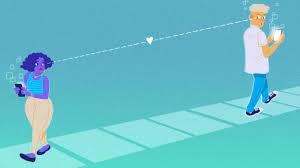
</div>

In [209]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from termcolor import colored

import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.width",600)
pd.set_option("display.max_rows",100)
pd.set_option('display.float_format', lambda x: '%.3f' % x) 

from sklearn.preprocessing import StandardScaler, scale, normalize, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score, accuracy_score, confusion_matrix

from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

## Load and EDA

In [2]:
df = pd.read_csv("profiles.csv")
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22.000,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...","books:<br />\nabsurdistan, the republic, of mi...",food.<br />\nwater.<br />\ncell phone.<br />\n...,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet!<br />\nyou...,"asian, white",75.000,-1.000,transportation,2012-06-28-20-30,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35.000,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories.<br /...,NaN,NaN,i am very open and will share just about anyth...,NaN,white,70.000,80000.000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38.000,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement<br />\nconversation<br />\ncreation<b...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ...",NaN,68.000,-1.000,NaN,2012-06-27-09-10,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23.000,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . .<br />\nlynch, j...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.,white,71.000,20000.000,student,2012-06-28-14-22,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29.000,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians<br />\nat the...",NaN,NaN,NaN,NaN,NaN,"asian, black, other",66.000,-1.000,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [30]:
df.sample()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
38831,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print(f'Observations -------> {df.shape[0]}')
    print(f'Features     -------> {df.shape[1]}')
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print(" MISSING VALUES ".center(70, "*"))
    print(df.isnull().sum())
    print(" DESCRIPTIVE STATISTICS ".center(70, "*"))
    print(df.describe().T)
check_df(df)

******************************* SHAPE ********************************
Observations -------> 60552
Features     -------> 31
Shape of dataset: (60552, 31)
************************* TYPES OF FEATURES **************************
age            float64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income         float64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object 

******************************** INFO ********

In [32]:
df.describe(exclude=np.number).T

,count,unique,top,freq
body_type,8666,12,average,2274
diet,5761,18,mostly anything,2621
drinks,9012,6,socially,6679
drugs,7215,3,never,5972
education,8459,31,graduated from college/university,3770
essay0,8667,8664,ask me,2
essay1,8347,8278,enjoying it,9
essay2,8049,7921,listening,18
essay3,7690,7148,my smile,79
essay4,7879,7872,yes.,3


In [33]:
df = df.drop_duplicates()

In [34]:
df.duplicated().sum()

0

In [35]:
df.reset_index(drop=True, inplace=True)

In [36]:
df.shape

(9515, 31)

<Axes: >

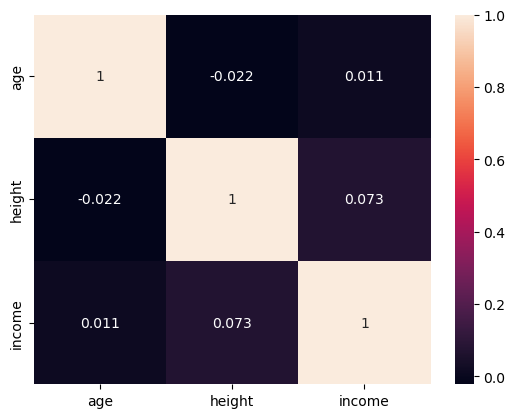

In [37]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

## Handling missing values and Feature Engineering

In [38]:
# age

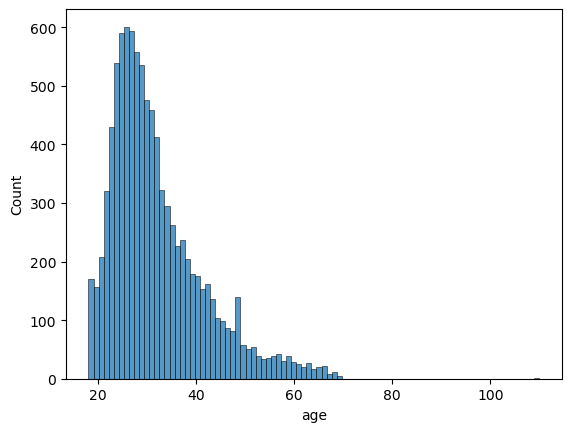

In [39]:
sns.histplot(x=df["age"]);

In [40]:
df[df.age.isnull()==True]

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9,ethnicity,height,income,job,last_online,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
9514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
#remove NaN 
df = df.dropna(subset = ["age"])

In [42]:
# body_type

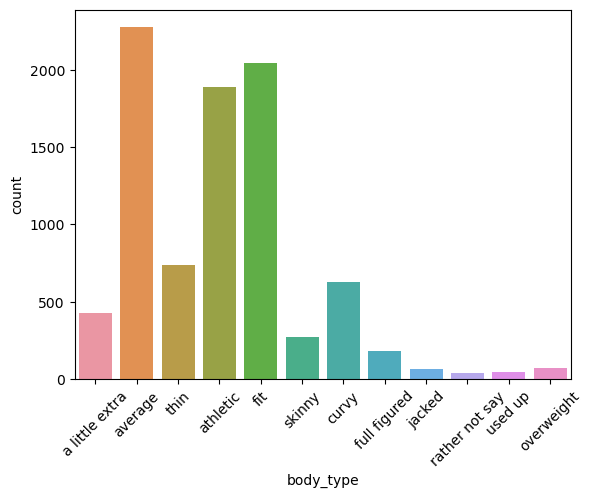

In [43]:
plt.figure()
plt.xticks(rotation=45)
sns.countplot(x=df["body_type"]);

In [44]:
d = {"a little extra":"overweight", "skinny":"thin","athletic":"fit",
     "jacked":"fit", "curvy":"full figured","used up":"other","rather not say":"other"}
df["body_type"] = df["body_type"].map(d)

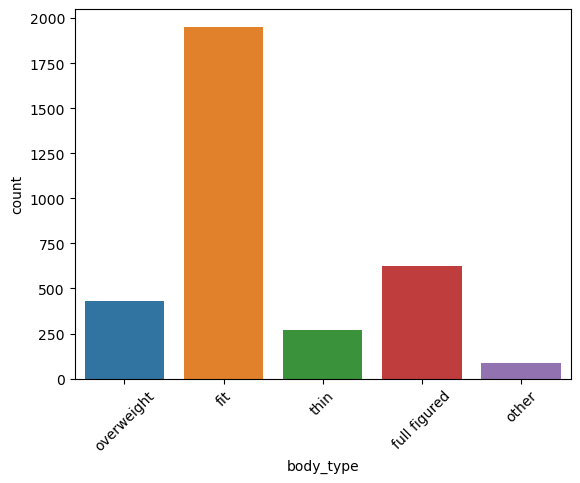

In [47]:
plt.figure()
plt.xticks(rotation=45)
sns.countplot(x=df["body_type"]);

In [48]:
df["body_type"].fillna("other", inplace=True)

In [50]:
df.to_pickle("df.pkl")

In [160]:
df = pd.read_pickle("df.pkl")

In [161]:
# diet

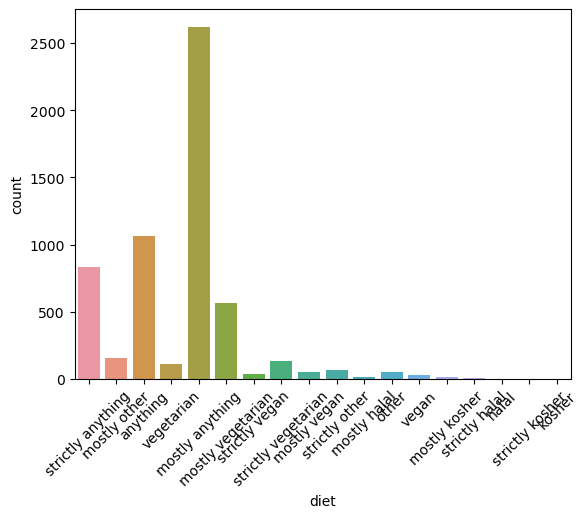

In [162]:
plt.figure()
plt.xticks(rotation=45)
sns.countplot(x=df["diet"]);

In [163]:
df["diet"] = df["diet"].replace({"strictly anything":"anything",
                                 "mostly anything":"anything",
                                 "mostly other":"other",
                                 "strictly other":"other",
                                 "mostly vegetarian":"vegetarian",
                                 "strictly vegetarian":"vegetarian",
                                 "strictly vegan":"vegan",
                                 "mostly vegan":"vegan",
                                 "mostly halal":"halal",
                                 "strictly halal":"halal",
                                 "strictly kosher":"kosher",
                                 "mostly kosher":"kosher" 
                                })

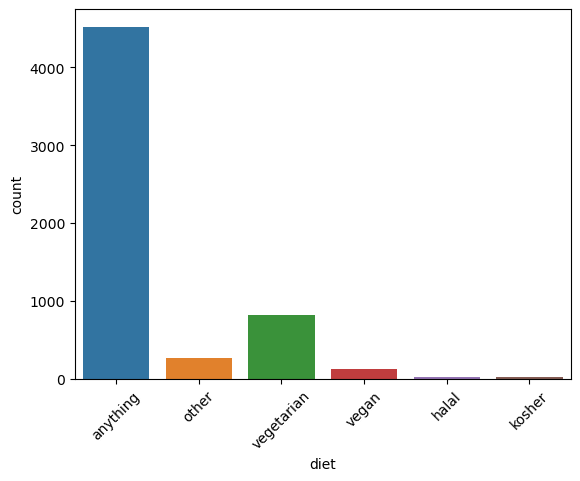

In [164]:
plt.figure()
plt.xticks(rotation=45)
sns.countplot(x=df["diet"]);

In [165]:
df["diet"].fillna(df["diet"].mode()[0], inplace=True)

In [166]:
# drinks

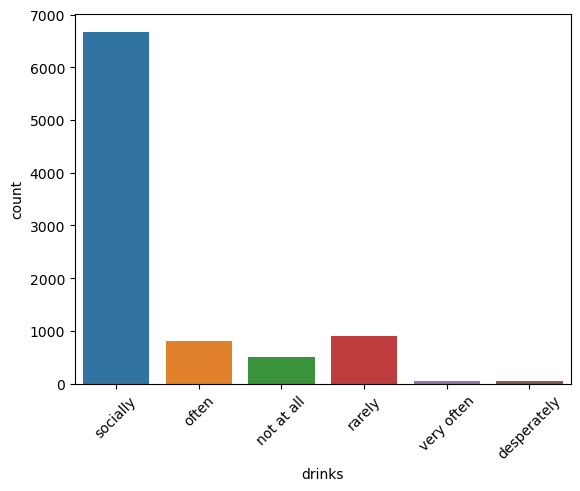

In [167]:
plt.figure()
plt.xticks(rotation=45)
sns.countplot(x=df["drinks"]);

In [168]:
df["drinks"] = df["drinks"].replace({"socially":"moderate",
                                     "very often":"often",
                                     "desperately":"often"
                                    })

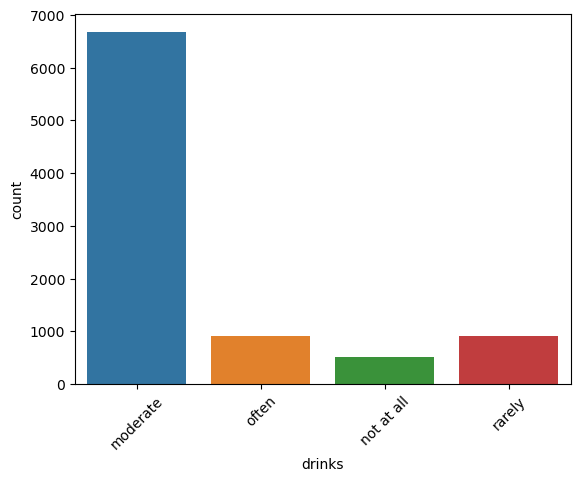

In [169]:
plt.figure()
plt.xticks(rotation=45)
sns.countplot(x=df["drinks"]);

In [170]:
df["drinks"].fillna("moderate", inplace=True)

In [171]:
# drugs

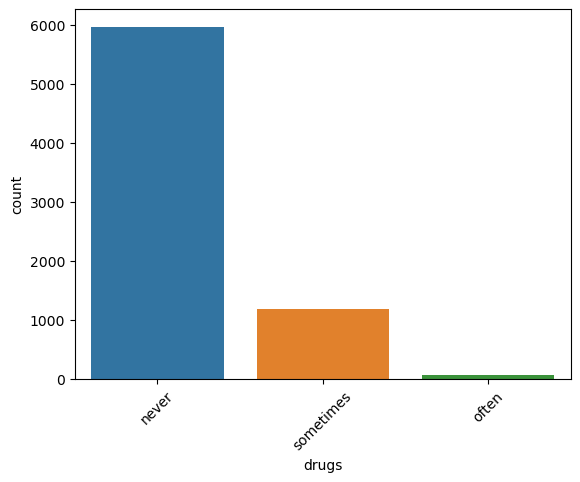

In [172]:
plt.figure()
plt.xticks(rotation=45)
sns.countplot(x=df["drugs"]);

In [173]:
df["drugs"].fillna("sometimes", inplace=True)

In [174]:
# education

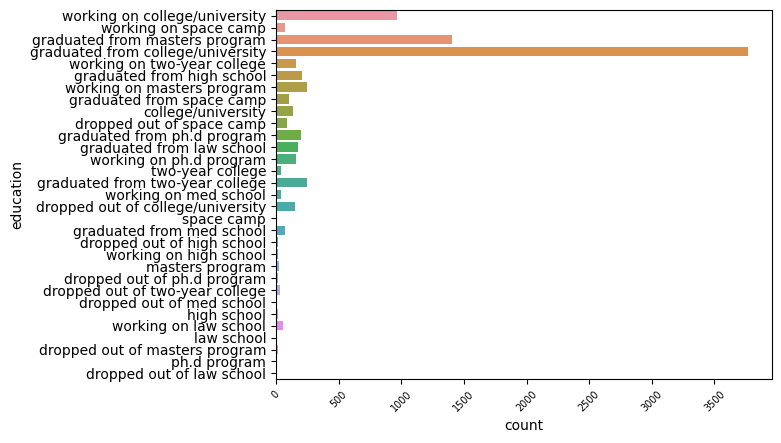

In [175]:
plt.figure()
plt.xticks(rotation=45, size=7)
sns.countplot(y=df["education"]);

In [176]:
df["education"] = df["education"].replace({"working on college/university":"university",
                                           "working on space camp":"other",
                                           "graduated from masters program":"master",
                                           "graduated from college/university":"university",
                                           "working on two-year college":"associate",
                                           "graduated from high school":"high school",
                                           "working on masters program":"master",
                                           "graduated from space camp":"other",
                                           "college/university":"university",
                                           "dropped out of space camp":"other",
                                           "graduated from ph.d program":"phd",
                                           "graduated from law school":"law",
                                           "working on ph.d program":"phd",
                                           "two-year college":"associate",
                                           "graduated from two-year college":"associate",
                                           "working on med school": "med",
                                           'dropped out of college/university': 'university',
                                           'space camp': 'other',
                                           'graduated from med school': 'med',
                                           'dropped out of high school': 'high school',
                                           'working on high school': 'high school',
                                           'masters program': 'master',
                                           'dropped out of ph.d program': 'phd',
                                           'dropped out of two-year college': 'associate',
                                           'dropped out of med school': 'med',
                                           'working on law school': 'law',
                                           'law school': 'law',
                                           'dropped out of masters program': 'master',
                                           'ph.d program': 'phd',
                                           'dropped out of law school': 'law'
                                          })

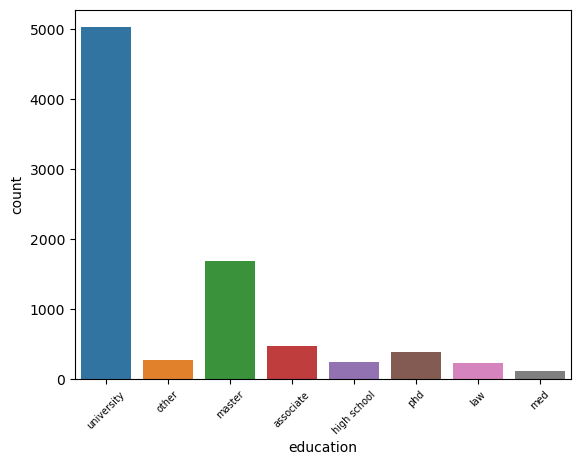

In [179]:
plt.figure()
plt.xticks(rotation=45, size=7)
sns.countplot(x=df["education"]);

In [180]:
df["education"].fillna("university",inplace=True)

In [182]:
df.to_pickle("df1.pkl")

In [242]:
df = pd.read_pickle("df1.pkl")

In [243]:
# ethnicity       

In [244]:

df["ethnicity"] = df["ethnicity"].fillna("white")

In [245]:
df["ethnicity"] = df["ethnicity"].apply(lambda x: "white" if "white" in x else ("black" if "black" in x else "other"))

In [246]:
df["ethnicity"].unique()

array(['white', 'black', 'other'], dtype=object)

In [247]:
# job

In [248]:
df["job"].unique()

array(['transportation', 'hospitality / travel', nan, 'student',
       'artistic / musical / writer', 'computer / hardware / software',
       'banking / financial / real estate', 'entertainment / media',
       'sales / marketing / biz dev', 'other', 'medicine / health',
       'science / tech / engineering', 'executive / management',
       'education / academia', 'clerical / administrative',
       'construction / craftsmanship', 'rather not say',
       'political / government', 'law / legal services', 'unemployed',
       'military', 'retired'], dtype=object)

In [249]:
df['job'] = df['job'].replace({ 
    'transportation': 'Other',
    'hospitality / travel': 'Other',
    'student': 'Other',
    'artistic / musical / writer': 'Artistic',
    'computer / hardware / software': 'Technology',
    'banking / financial / real estate': 'Finance',
    'entertainment / media': 'Media',
    'sales / marketing / biz dev': 'Sales',
    'other': 'Other',
    'medicine / health': 'Health',
    'science / tech / engineering': 'Science',
    'executive / management': 'Management',
    'education / academia': 'Education',
    'clerical / administrative': 'Administration',
    'construction / craftsmanship': 'Construction',
    'rather not say': 'Other',
    'political / government': 'Government',
    'law / legal services': 'Law',
    'unemployed': 'Other',
    'military': 'Other',
    'retired': 'Other'})


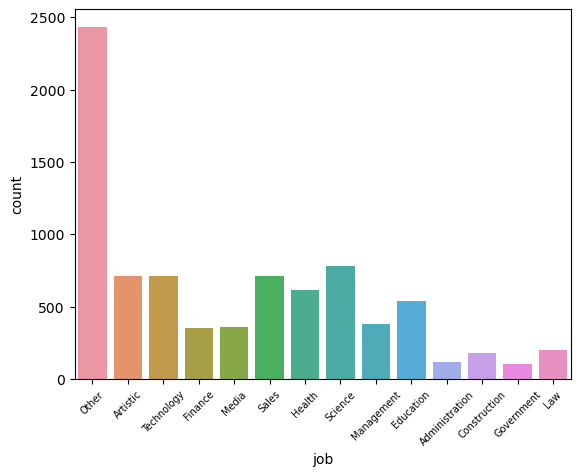

In [250]:
plt.figure()
plt.xticks(rotation=45, size=7)
sns.countplot(x=df["job"]);

In [251]:
df["job"].fillna("Other",inplace=True)

In [252]:
# offspring      

In [253]:
df.offspring.value_counts()

offspring
doesn&rsquo;t have kids                                1224
doesn&rsquo;t have kids, but might want them            620
doesn&rsquo;t have kids, but wants them                 578
doesn&rsquo;t want kids                                 454
has a kid                                               304
has kids                                                291
doesn&rsquo;t have kids, and doesn&rsquo;t want any     172
has kids, but doesn&rsquo;t want more                    68
has a kid, but doesn&rsquo;t want more                   41
has a kid, and might want more                           36
wants kids                                               29
might want kids                                          28
has kids, and might want more                            24
has a kid, and wants more                                12
has kids, and wants more                                  5
Name: count, dtype: int64

In [254]:
df["offspring"].fillna("0",inplace=True)

In [255]:
df["offspring"] = df["offspring"].apply(lambda x: "1" if "has" in x else "0")

In [256]:
df["offspring"] = df["offspring"].astype(int)

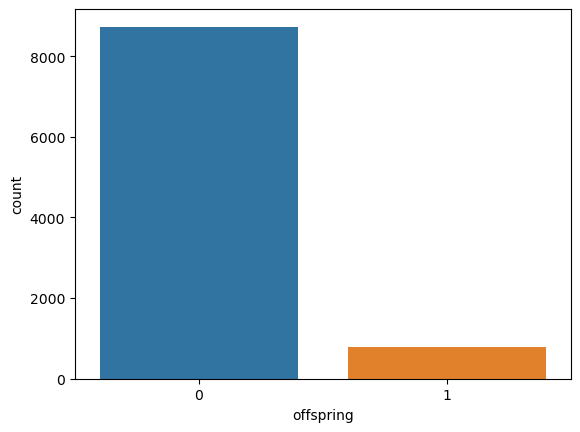

In [257]:
sns.countplot(x=df["offspring"]);

In [258]:
# pets

In [259]:
df.pets.value_counts()

pets
likes dogs and likes cats          2314
likes dogs                         1152
has dogs                            683
likes dogs and has cats             674
has dogs and likes cats             384
likes dogs and dislikes cats        301
has dogs and has cats               226
has cats                            221
likes cats                          200
has dogs and dislikes cats           82
dislikes dogs and dislikes cats      42
dislikes dogs and likes cats         36
dislikes cats                        20
dislikes dogs and has cats           13
dislikes dogs                         4
Name: count, dtype: int64

In [260]:
df["pets"].fillna("1",inplace=True)

In [261]:
df["pets"] = df["pets"].apply(lambda x: "0" if "dislike" in x else "1")

In [262]:
df["pets"] = df["pets"].astype(int)

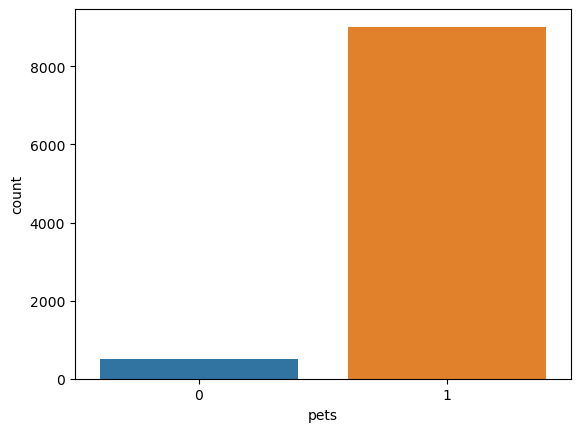

In [263]:
sns.countplot(x=df["pets"]);

In [264]:
# religion

In [265]:
df["religion"].value_counts()

religion
agnosticism                                   448
other                                         417
agnosticism but not too serious about it      400
agnosticism and laughing about it             386
catholicism but not too serious about it      367
atheism                                       363
atheism and laughing about it                 329
other and laughing about it                   325
christianity but not too serious about it     320
christianity                                  297
other but not too serious about it            243
judaism but not too serious about it          232
atheism but not too serious about it          200
catholicism                                   165
atheism and somewhat serious about it         138
christianity and somewhat serious about it    133
other and somewhat serious about it           122
catholicism and laughing about it             117
judaism and laughing about it                 113
agnosticism and somewhat serious about it

In [266]:
df["religion"].fillna("other", inplace=True)

In [267]:
df["religion"] = df["religion"].apply(lambda x: "agnosticism" if "agnosticism" in x else("catholicism" if "catholicism" in x else("atheism" if "atheism" in x else("christianity" if "christianity" in x else "other"))))

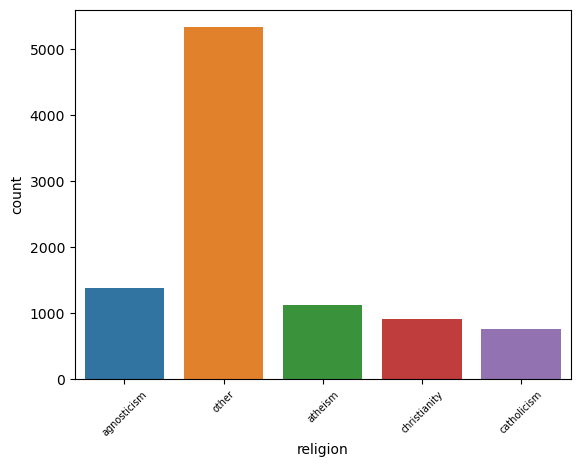

In [268]:
plt.figure()
plt.xticks(rotation=45, size=7)
sns.countplot(x=df["religion"]);

In [269]:
# sign 

In [270]:
df["sign"].value_counts()

sign
leo and it&rsquo;s fun to think about            277
taurus and it&rsquo;s fun to think about         275
gemini and it&rsquo;s fun to think about         271
cancer and it&rsquo;s fun to think about         260
scorpio and it&rsquo;s fun to think about        258
libra and it&rsquo;s fun to think about          257
virgo and it&rsquo;s fun to think about          257
pisces and it&rsquo;s fun to think about         253
aries and it&rsquo;s fun to think about          252
aries but it doesn&rsquo;t matter                250
aquarius but it doesn&rsquo;t matter             250
sagittarius and it&rsquo;s fun to think about    242
leo but it doesn&rsquo;t matter                  239
virgo but it doesn&rsquo;t matter                236
aquarius and it&rsquo;s fun to think about       235
gemini but it doesn&rsquo;t matter               235
cancer but it doesn&rsquo;t matter               233
taurus but it doesn&rsquo;t matter               222
sagittarius but it doesn&rsquo;t matter  

In [271]:
df["sign_feeling"] = df["sign"].apply(lambda x: "strong" if "fun to think about" or "it matters a lot" in x else "indifference")

In [273]:
df.to_pickle("df3.pkl")

In [285]:
df = pd.read_pickle("df3.pkl")

In [290]:
import random
# Step 1: Identify non-missing values
non_missing_values = df['sign'].dropna().unique()

# Step 2: Replace NaN values with a random choice from non-missing values
df['sign'] = df['sign'].apply(lambda x: random.choice(non_missing_values) if pd.isnull(x) else x)

In [291]:
df["sign"] = df["sign"].apply(lambda x: x.split()[0])


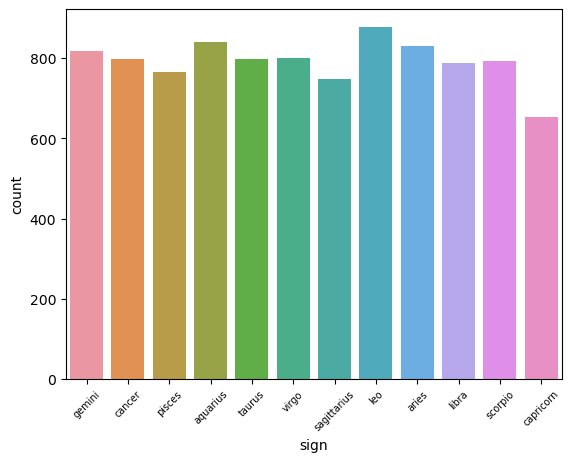

In [292]:
plt.figure()
plt.xticks(rotation=45, size=7)
sns.countplot(x=df["sign"]);

In [ ]:
# smokes 

In [296]:
df["smokes"].unique()

array(['sometimes', 'no', nan, 'when drinking', 'yes', 'trying to quit'],
      dtype=object)

In [297]:
df["smokes"] = df["smokes"].replace({"sometimes":"yes",
                                     "when drinking":"yes",
                                     "trying to quit":"yes"
                                    })

In [298]:
df["smokes"].fillna("yes", inplace=True)

In [299]:
df.isnull().sum()

age                0
body_type          0
diet               0
drinks             0
drugs              0
education          0
essay0           847
essay1          1167
essay2          1465
essay3          1824
essay4          1635
essay5          1700
essay6          2162
essay7          1961
essay8          3153
essay9          1960
ethnicity          0
height             0
income             0
job                0
last_online        0
location           0
offspring          0
orientation        0
pets               0
religion           0
sex                0
sign               0
smokes             0
speaks             6
status             0
sign_feeling       0
dtype: int64

<Axes: xlabel='height', ylabel='Count'>

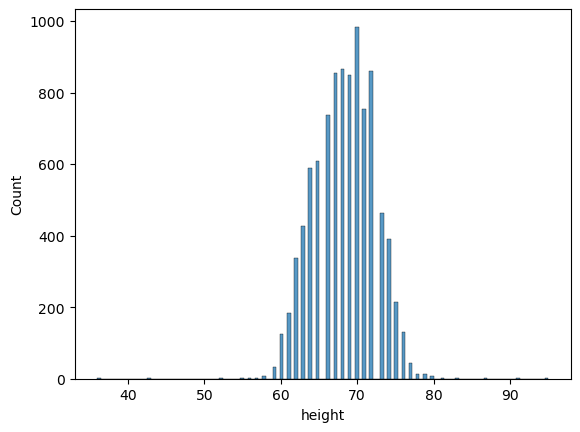

In [300]:
sns.histplot(x=df["height"])

In [307]:
df["income"].value_counts()

income
-1.000         7701
20000.000       461
100000.000      243
80000.000       177
50000.000       176
30000.000       162
40000.000       156
60000.000       123
150000.000      109
70000.000       102
1000000.000      72
250000.000       27
500000.000        5
Name: count, dtype: int64

In [308]:
df["income"] = df["income"].replace({-1.000:0}).astype(int)

In [310]:
df["income"] = df["income"].replace({0:df["income"].mean()})

In [312]:
df["income"] = df["income"].astype(int)

In [319]:
df["last_online"] = pd.to_datetime(df["last_online"], format="%Y-%m-%d-%H-%M")
df["last_online_month"] = df["last_online"].dt.month
df["last_online_day"] = df["last_online"].dt.day
df["last_online_hour"] = df["last_online"].dt.hour


In [322]:
del(df["last_online"])

In [327]:
df.to_pickle("dff.pkl")

In [4]:
df = pd.read_pickle("dff.pkl")

In [9]:
df["age"] = df["age"].astype(int)

In [10]:
df["age"].describe()

count   9514.000
mean      32.084
std        9.445
min       18.000
25%       25.000
50%       30.000
75%       36.000
max      110.000
Name: age, dtype: float64

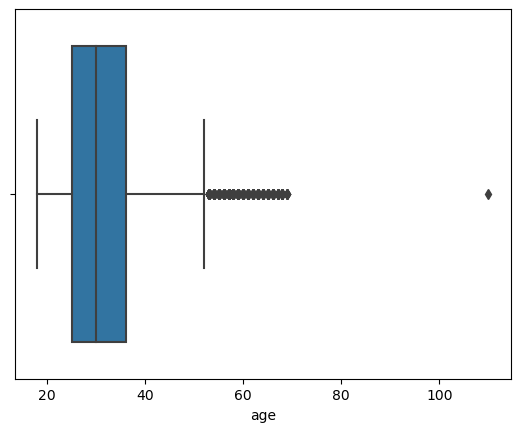

In [12]:
sns.boxplot(x=df["age"]);

In [13]:
df = df[df.age < 100]

In [15]:
df["generation"] = df["age"].apply(lambda x: 1 if x < 33 else(2 if x < 48 else 3))

<Axes: xlabel='generation', ylabel='count'>

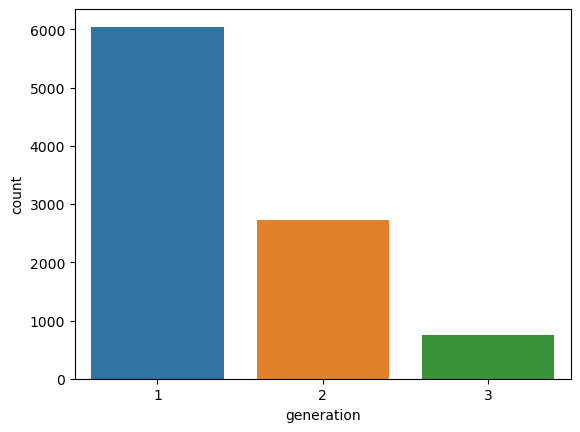

In [16]:
sns.countplot(x=df["generation"])

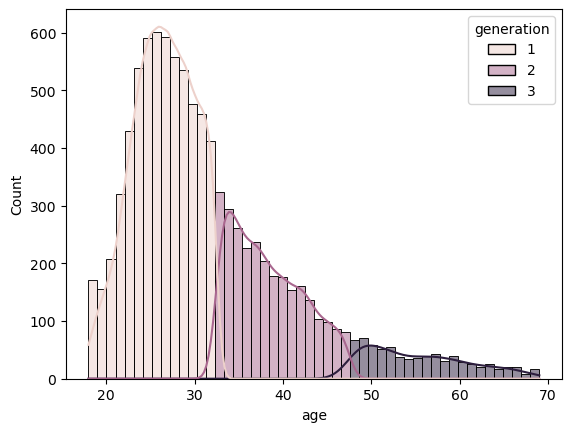

In [17]:
sns.histplot(df, x="age", hue="generation", kde=True);

In [18]:
df.to_pickle("ndf.pkl")

In [177]:
df = pd.read_pickle("ndf.pkl")

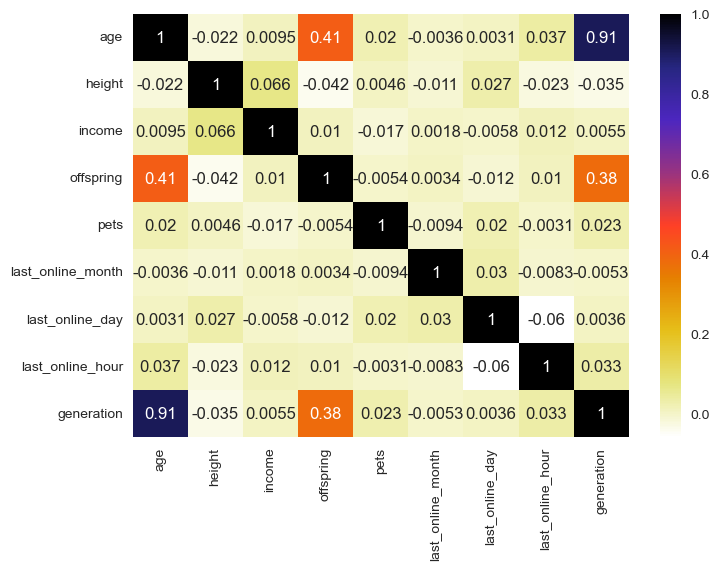

In [189]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap=plt.cm.CMRmap_r);

In [22]:
abs(df.corr(numeric_only=True)["age"]).sort_values(ascending=False)

age                 1.000
generation          0.906
offspring           0.410
last_online_hour    0.037
height              0.022
pets                0.020
income              0.010
last_online_month   0.004
last_online_day     0.003
Name: age, dtype: float64

## 1 - Can your dating profile predict your age?

In [178]:
df1 = df[["age","generation","offspring","body_type","diet",'drinks', 'drugs', 'education','ethnicity','job', 'location','orientation','religion', 'sex', 'sign', 'smokes','status', 'sign_feeling']]

In [57]:
df1.sample()

,age,generation,offspring,body_type,diet,drinks,drugs,education,ethnicity,job,location,orientation,religion,sex,sign,smokes,status,sign_feeling
6664,23,1,0,other,anything,moderate,sometimes,high school,other,Other,"san francisco, california",straight,other,m,virgo,yes,single,strong


# Data Preprocessing

In [179]:
X = df1.drop("age", axis=1)
y = df1[["age"]]

In [180]:
X = pd.get_dummies(X, drop_first=True)

In [169]:
X

,generation,offspring,body_type_full figured,body_type_other,body_type_overweight,body_type_thin,diet_halal,diet_kosher,diet_other,diet_vegan,diet_vegetarian,drinks_not at all,drinks_often,drinks_rarely,drugs_often,drugs_sometimes,education_high school,education_law,education_master,education_med,education_other,education_phd,education_university,ethnicity_other,ethnicity_white,job_Artistic,job_Construction,job_Education,job_Finance,job_Government,job_Health,job_Law,job_Management,job_Media,job_Other,job_Sales,job_Science,job_Technology,"location_albany, california","location_atherton, california","location_belmont, california","location_belvedere tiburon, california","location_benicia, california","location_berkeley, california","location_billings, montana","location_bolinas, california","location_boulder, colorado","location_brisbane, california","location_burlingame, california","location_canyon country, california","location_castro valley, california","location_corte madera, california","location_crockett, california","location_daly city, california","location_east palo alto, california","location_el cerrito, california","location_el granada, california","location_el sobrante, california","location_emeryville, california","location_fairfax, california","location_foster city, california","location_freedom, california","location_fremont, california","location_glencove, california","location_green brae, california","location_hacienda heights, california","location_half moon bay, california","location_hayward, california","location_hercules, california","location_honolulu, hawaii","location_kentfield, california","location_lafayette, california","location_larkspur, california","location_madrid, spain","location_martinez, california","location_menlo park, california","location_mill valley, california","location_millbrae, california","location_milwaukee, wisconsin","location_montara, california","location_moraga, california","location_mountain view, california","location_new york, new york","location_novato, california","location_oakland, california","location_orinda, california","location_pacifica, california","location_palo alto, california","location_petaluma, california","location_pinole, california","location_pleasant hill, california","location_point richmond, california","location_portland, oregon","location_redwood city, california","location_richmond, california","location_riverside, california","location_rodeo, california","location_rohnert park, california","location_ross, california","location_sacramento, california","location_san anselmo, california","location_san bruno, california","location_san carlos, california","location_san diego, california","location_san francisco, california","location_san geronimo, california","location_san jose, california","location_san leandro, california","location_san lorenzo, california","location_san mateo, california","location_san pablo, california","location_san quentin, california","location_san rafael, california","location_santa cruz, california","location_sausalito, california","location_south san francisco, california","location_stanford, california","location_tiburon, california","location_tucson, arizona","location_vallejo, california","location_walnut creek, california","location_west oakland, california","location_westlake, california","location_woodacre, california","location_woodbridge, virginia","location_woodside, california",orientation_gay,orientation_straight,religion_atheism,religion_catholicism,religion_christianity,religion_other,sex_m,sign_aries,sign_cancer,sign_capricorn,sign_gemini,sign_leo,sign_libra,sign_pisces,sign_sagittarius,sign_scorpio,sign_taurus,sign_virgo,smokes_yes,status_married,status_seeing someone,status_single
0,1,0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,

In [183]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)

In [185]:
gbr = GradientBoostingRegressor()
model_gbr = gbr.fit(X_train,y_train)
pred_gbr = model_gbr.predict(X_test)

In [186]:
print(f"RMSE: {root_mean_squared_error(pred_gbr,y_test)}\nR2 SCORE: {r2_score(pred_gbr,y_test)}")

RMSE: 3.6289124931911845
R2 SCORE: 0.8018442437526373


In [187]:
rf = RandomForestRegressor()
model_rf = gbr.fit(X_train,y_train)
pred_rf = model_rf.predict(X_test)

In [188]:
print(f"RMSE: {root_mean_squared_error(pred_rf,y_test)}\nR2 SCORE: {r2_score(pred_rf,y_test)}")

RMSE: 3.6294543378070334
R2 SCORE: 0.8017598319323066


## PYCARET MODELLING

In [190]:
from pycaret.regression import*
setup(df1, target="age")

,Description,Value
0,Session id,8387
1,Target,age
2,Target type,Regression
3,Original data shape,"(9513, 18)"
4,Transformed data shape,"(9513, 74)"
5,Transformed train set shape,"(6659, 74)"
6,Transformed test set shape,"(2854, 74)"
7,Numeric features,2
8,Categorical features,15
9,Preprocess,True


In [191]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.9694,13.1494,3.6254,0.8481,0.1123,0.0969,0.1780
lightgbm,Light Gradient Boosting Machine,2.9622,13.3352,3.6511,0.8459,0.1123,0.0963,0.1370
rf,Random Forest Regressor,3.0678,14.3231,3.7840,0.8345,0.1170,0.0998,0.5500
ada,AdaBoost Regressor,3.1509,14.3350,3.7858,0.8342,0.1171,0.1027,0.1460
br,Bayesian Ridge,3.0826,14.3611,3.7888,0.8341,0.1162,0.1003,0.0580
ridge,Ridge Regression,3.0836,14.3648,3.7893,0.8340,0.1162,0.1003,0.0660
lr,Linear Regression,3.0848,14.3716,3.7901,0.8339,0.1162,0.1003,0.5980
huber,Huber Regressor,3.0684,14.5815,3.8175,0.8316,0.1160,0.0994,0.1670
omp,Orthogonal Matching Pursuit,3.1171,14.6155,3.8223,0.8312,0.1179,0.1017,0.0590
xgboost,Extreme Gradient Boosting,3.0830,14.7633,3.8409,0.8294,0.1179,0.1001,0.1050


In [192]:
best_model = create_model("gbr")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0745,13.9118,3.7299,0.8411,0.1173,0.1004
1,2.9210,12.8672,3.5871,0.8631,0.1104,0.0958
2,2.8978,13.1474,3.6259,0.8549,0.1130,0.0958
3,2.9489,12.7777,3.5746,0.8413,0.1101,0.0950
4,3.0976,14.2217,3.7712,0.8338,0.1162,0.1004
5,2.9405,12.7891,3.5762,0.8450,0.1120,0.0971
6,3.0086,13.3873,3.6589,0.8446,0.1162,0.0998
7,2.9873,13.5265,3.6778,0.8532,0.1126,0.0973
8,2.8981,12.4937,3.5346,0.8578,0.1054,0.0917


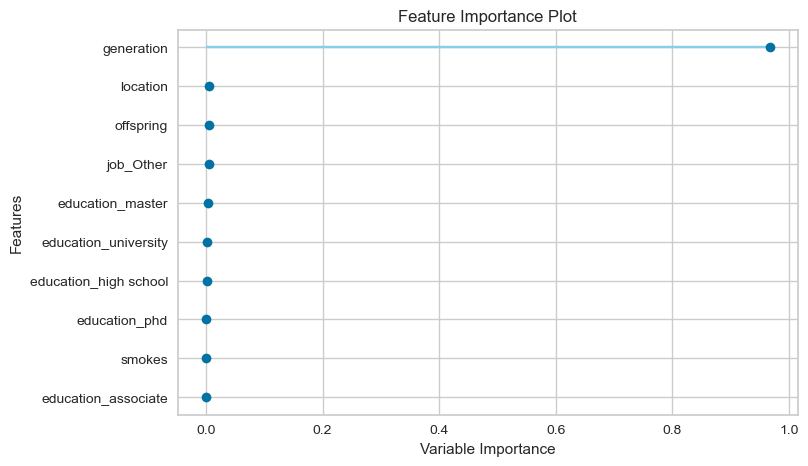

In [194]:
plot_model(best_model, "feature")

## Can your dating profile predict the generation you belong to?

## PYCARET MODELLING

In [197]:
df1 = df1.drop("age",axis=1)

In [198]:
from pycaret.classification import*
setup(df1, target="generation")

,Description,Value
0,Session id,6950
1,Target,generation
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(9513, 17)"
5,Transformed data shape,"(9513, 73)"
6,Transformed train set shape,"(6659, 73)"
7,Transformed test set shape,"(2854, 73)"
8,Numeric features,1
9,Categorical features,15


In [199]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.6702,0.0000,0.6702,0.6239,0.6143,0.2246,0.2607,0.0940
gbc,Gradient Boosting Classifier,0.6696,0.0000,0.6696,0.6212,0.6075,0.2138,0.2559,0.3610
ada,Ada Boost Classifier,0.6666,0.0000,0.6666,0.6200,0.6138,0.2241,0.2559,0.1170
ridge,Ridge Classifier,0.6659,0.0000,0.6659,0.6125,0.5958,0.1892,0.2355,0.0610
lda,Linear Discriminant Analysis,0.6620,0.0000,0.6620,0.6111,0.5953,0.2227,0.2619,0.0640
svm,SVM - Linear Kernel,0.6600,0.0000,0.6600,0.6110,0.5684,0.1682,0.2336,0.0990
lightgbm,Light Gradient Boosting Machine,0.6558,0.0000,0.6558,0.6072,0.6105,0.2138,0.2350,0.2950
xgboost,Extreme Gradient Boosting,0.6435,0.0000,0.6435,0.5974,0.6055,0.2021,0.2159,0.1250
rf,Random Forest Classifier,0.6418,0.0000,0.6418,0.5917,0.5975,0.1812,0.1976,0.1770
dummy,Dummy Classifier,0.6357,0.0000,0.6357,0.4041,0.4941,0.0000,0.0000,0.0630


In [204]:
X = df1.drop("generation", axis=1)
y = df1[["generation"]]

In [205]:
X = pd.get_dummies(X, drop_first=True)

In [206]:
X = StandardScaler().fit_transform(X)

In [207]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [208]:
log = LogisticRegression()
model = log.fit(X_train, y_train)
model_pred = model.predict(X_test)

In [211]:
accuracy_score(model_pred, y_test)

0.6839007986548971

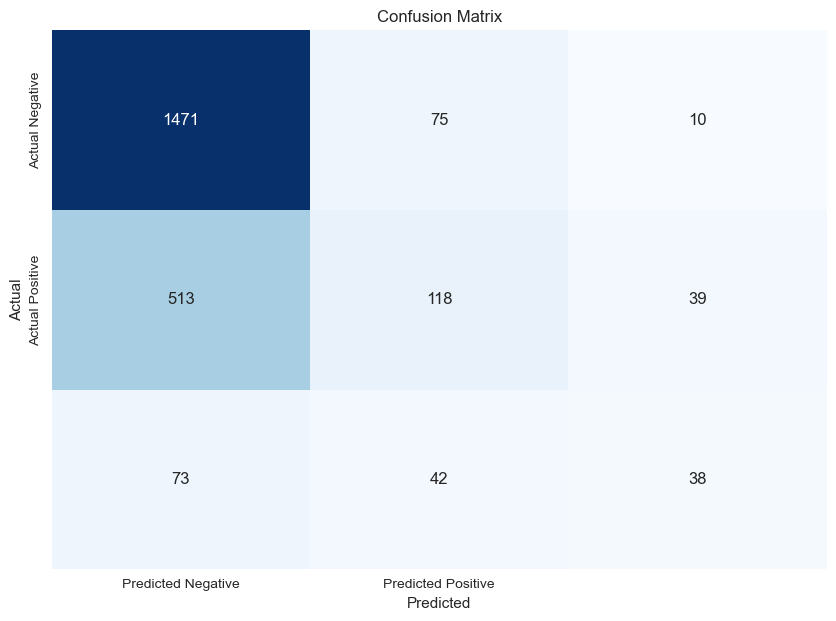

In [213]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, model_pred)

# Plot the heatmap
plt.figure(figsize=(10, 7)) # Adjust the figure size as needed
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"], 
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

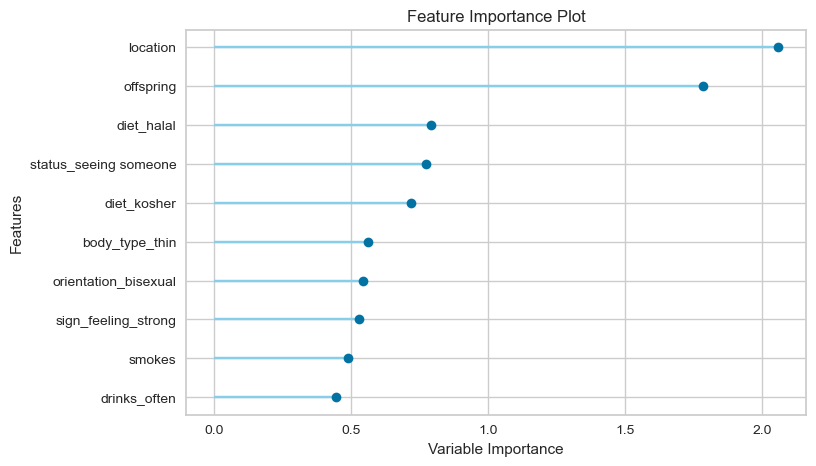

In [219]:
plot_model(best_model, plot="feature")